In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

In [3]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [ ]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# define collimating lens
crl_col = optics.CRL('crl_col', z=785.15, diameter=1e-3, roc=1000e-6)

prism1 = optics.Prism('prism', z=788.33, slope=1, x_width=500e-6, y_width=500e-6)

# define lenslet array
crl_list = []

# prism array
prism_list = []

spacing = 30e-6
x_pos = np.linspace(-1.5, 1.5, 4, dtype=float)*spacing
y_pos = np.linspace(-1.5, 1.5, 4, dtype=float)*spacing

for i in range(4):
    for j in range(4):
        crl_list.append(optics.CRL('crl%d' % (4*i+j), z=788.34, dx=x_pos[i], dy=y_pos[j], roc=5e-6, diameter=30e-6))
        prism_list.append(optics.Prism('prism%d' % (4*i+j), z=788.35, dx=x_pos[i], dy=y_pos[j], 
                                       x_width=30e-6, y_width=30e-6, slope=(i+j), orientation=i))
        

lens_image = optics.PPM('lens', FOV=200e-6, z=788.34)
        
IP = optics.PPM('IP', FOV=200e-6, z=789)

downstream_YAG = optics.PPM('YAG', FOV=200e-6, z=IP.z+1)

lens_image2 = optics.PPM('lens_image', FOV=200e-6, z=788.341)
lens_sum = optics.PPM('lens_sum', FOV=200e-6)
IP_sum = optics.PPM('IP_sum', FOV=200e-6)
IP_sum2 = optics.PPM('IP_sum2', FOV=200e-6)
downstream_sum = optics.PPM('YAG_sum', FOV=200e-6)

devices = devices = [mr1l0,mr2l0,lens_image,crl_col]

XPP_1 = beamline2d.Beamline(devices)

beam_lens = XPP_1.propagate_beamline(b1)

for i in range(len(crl_list)):
    # device list with current lens
    devices = [crl_list[i], prism_list[i], lens_image2, IP, downstream_YAG]

    # define beamline section
    XPP_2 = beamline2d.Beamline(devices)
    
    # propagation through IP
    b2 = XPP_2.propagate_until(beam_lens, 'IP')
    # propagation from IP through YAG
    b3 = XPP_2.propagate_between(b2, 'IP', 'YAG')
    
    # add to YAG just downstream lenses
    lens_sum.add_profile(XPP_2.lens_image.profile)
    
    # add to downstream YAG
    downstream_sum.add_complex_profile(b3)
    
    # add at IP, incoherently and coherently
    IP_sum.add_profile(XPP_2.IP.profile)
    IP_sum2.add_complex_profile(b2)

FWHM in x: 359.90462293506476 microns
FWHM in y: 359.90462293506476 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 37864000.00 microns
goal for zx: 155150000.00 microns
current zx: 117286000.00 microns
goal for zy: 155150000.00 microns
current zy: 117286000.00 microns
crl_col
focal length: 132.39
drift3
zRx: 5232514614.20 microns
zRy: 5232514614.20 microns
remaining distance: 3190000.00 microns
goal for zx: -899330156.79 microns
current zx: -902520156.79 microns
goal for zy: -899330156.79 microns
current zy: -902520156.79 microns
lens
x becomes unfocused
y becomes unfocused
focal length: 0.66
crl0
zRx: 2810.70 microns
zRy:

zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 1342.61 microns
goal for zx: -1468.09 microns
current zx: -2810.70 microns
goal for zy: -1468.09 microns
current zy: -2810.70 microns
drift3
IP
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 1000000.00 microns
goal for zx: 998531.91 microns
current zx: -1468.09 microns
goal for zy: 998531.91 microns
current zy: -1468.09 microns
x becomes unfocused
y becomes unfocused
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 995721.21 microns
goal for zx: 998531.91 microns
current zx: 2810.70 microns
goal for zy: 998531.91 microns
current zy: 2810.70 microns
drift4
YAG
x becomes unfocused
y becomes unfocused
focal length: 0.66
crl5
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 1000.00 microns
goal for zx: -660468.09 microns
current zx: -661468.09 microns
goal for zy: -660468.09 microns
current zy: -661468.09 microns
drift1
lens_image
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distan

drift3
IP
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 1000000.00 microns
goal for zx: 998531.91 microns
current zx: -1468.09 microns
goal for zy: 998531.91 microns
current zy: -1468.09 microns
x becomes unfocused
y becomes unfocused
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 995721.21 microns
goal for zx: 998531.91 microns
current zx: 2810.70 microns
goal for zy: 998531.91 microns
current zy: 2810.70 microns
drift4
YAG
x becomes unfocused
y becomes unfocused
focal length: 0.66
crl10
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 1000.00 microns
goal for zx: -660468.09 microns
current zx: -661468.09 microns
goal for zy: -660468.09 microns
current zy: -661468.09 microns
drift1
lens_image
zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 9000.00 microns
goal for zx: -651468.09 microns
current zx: -660468.09 microns
goal for zy: -651468.09 microns
current zy: -660468.09 microns
drift2
prism10
zRx: 2810.70 microns
zRy: 2810.70 

zRx: 2810.70 microns
zRy: 2810.70 microns
remaining distance: 995721.21 microns
goal for zx: 998531.91 microns
current zx: 2810.70 microns
goal for zy: 998531.91 microns
current zy: 2810.70 microns
drift4
YAG


<IPython.core.display.Javascript object>


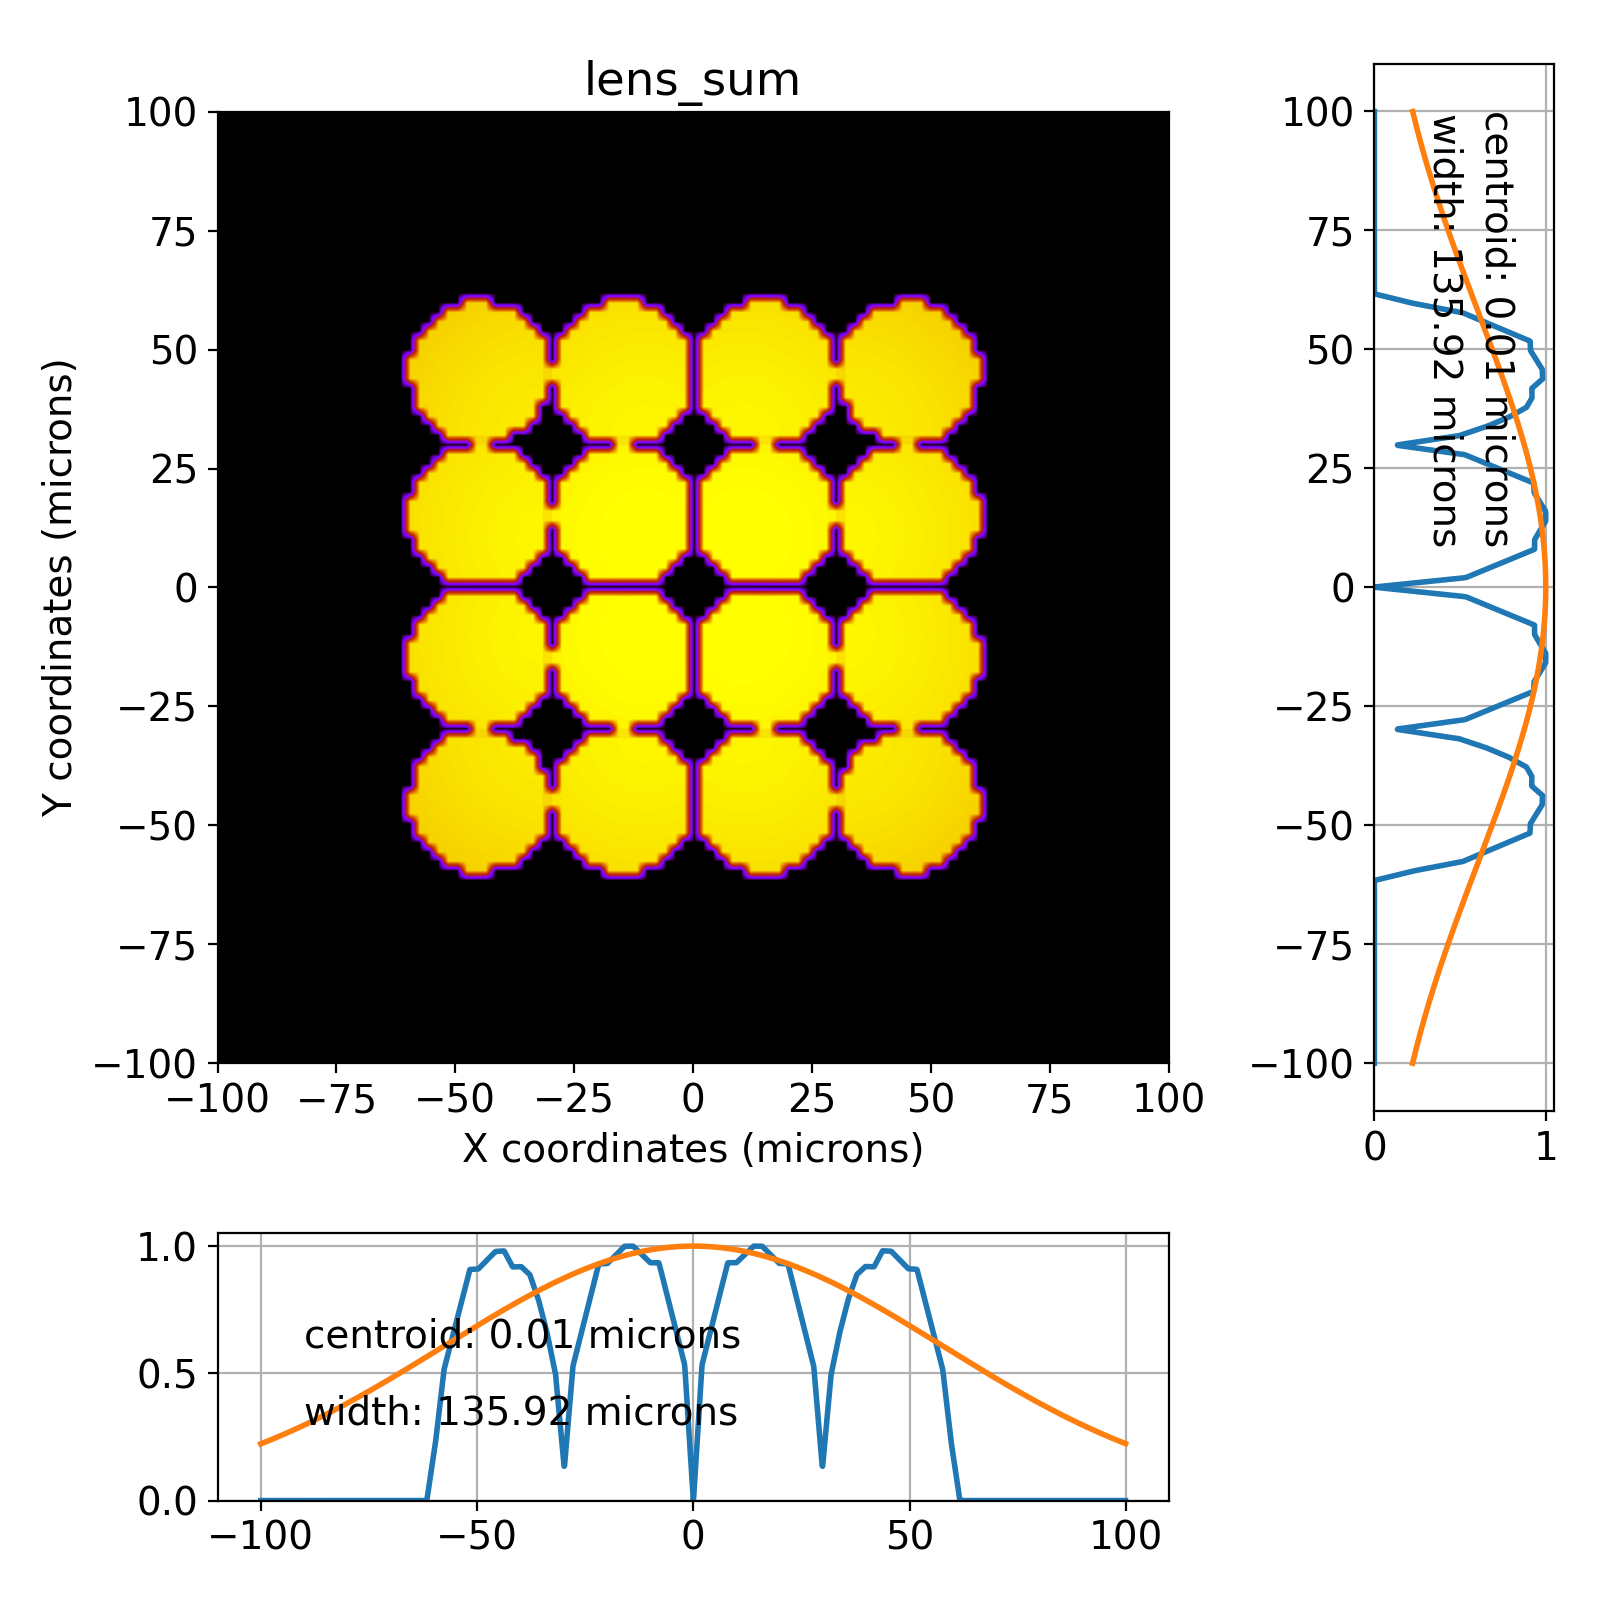

<IPython.core.display.Javascript object>


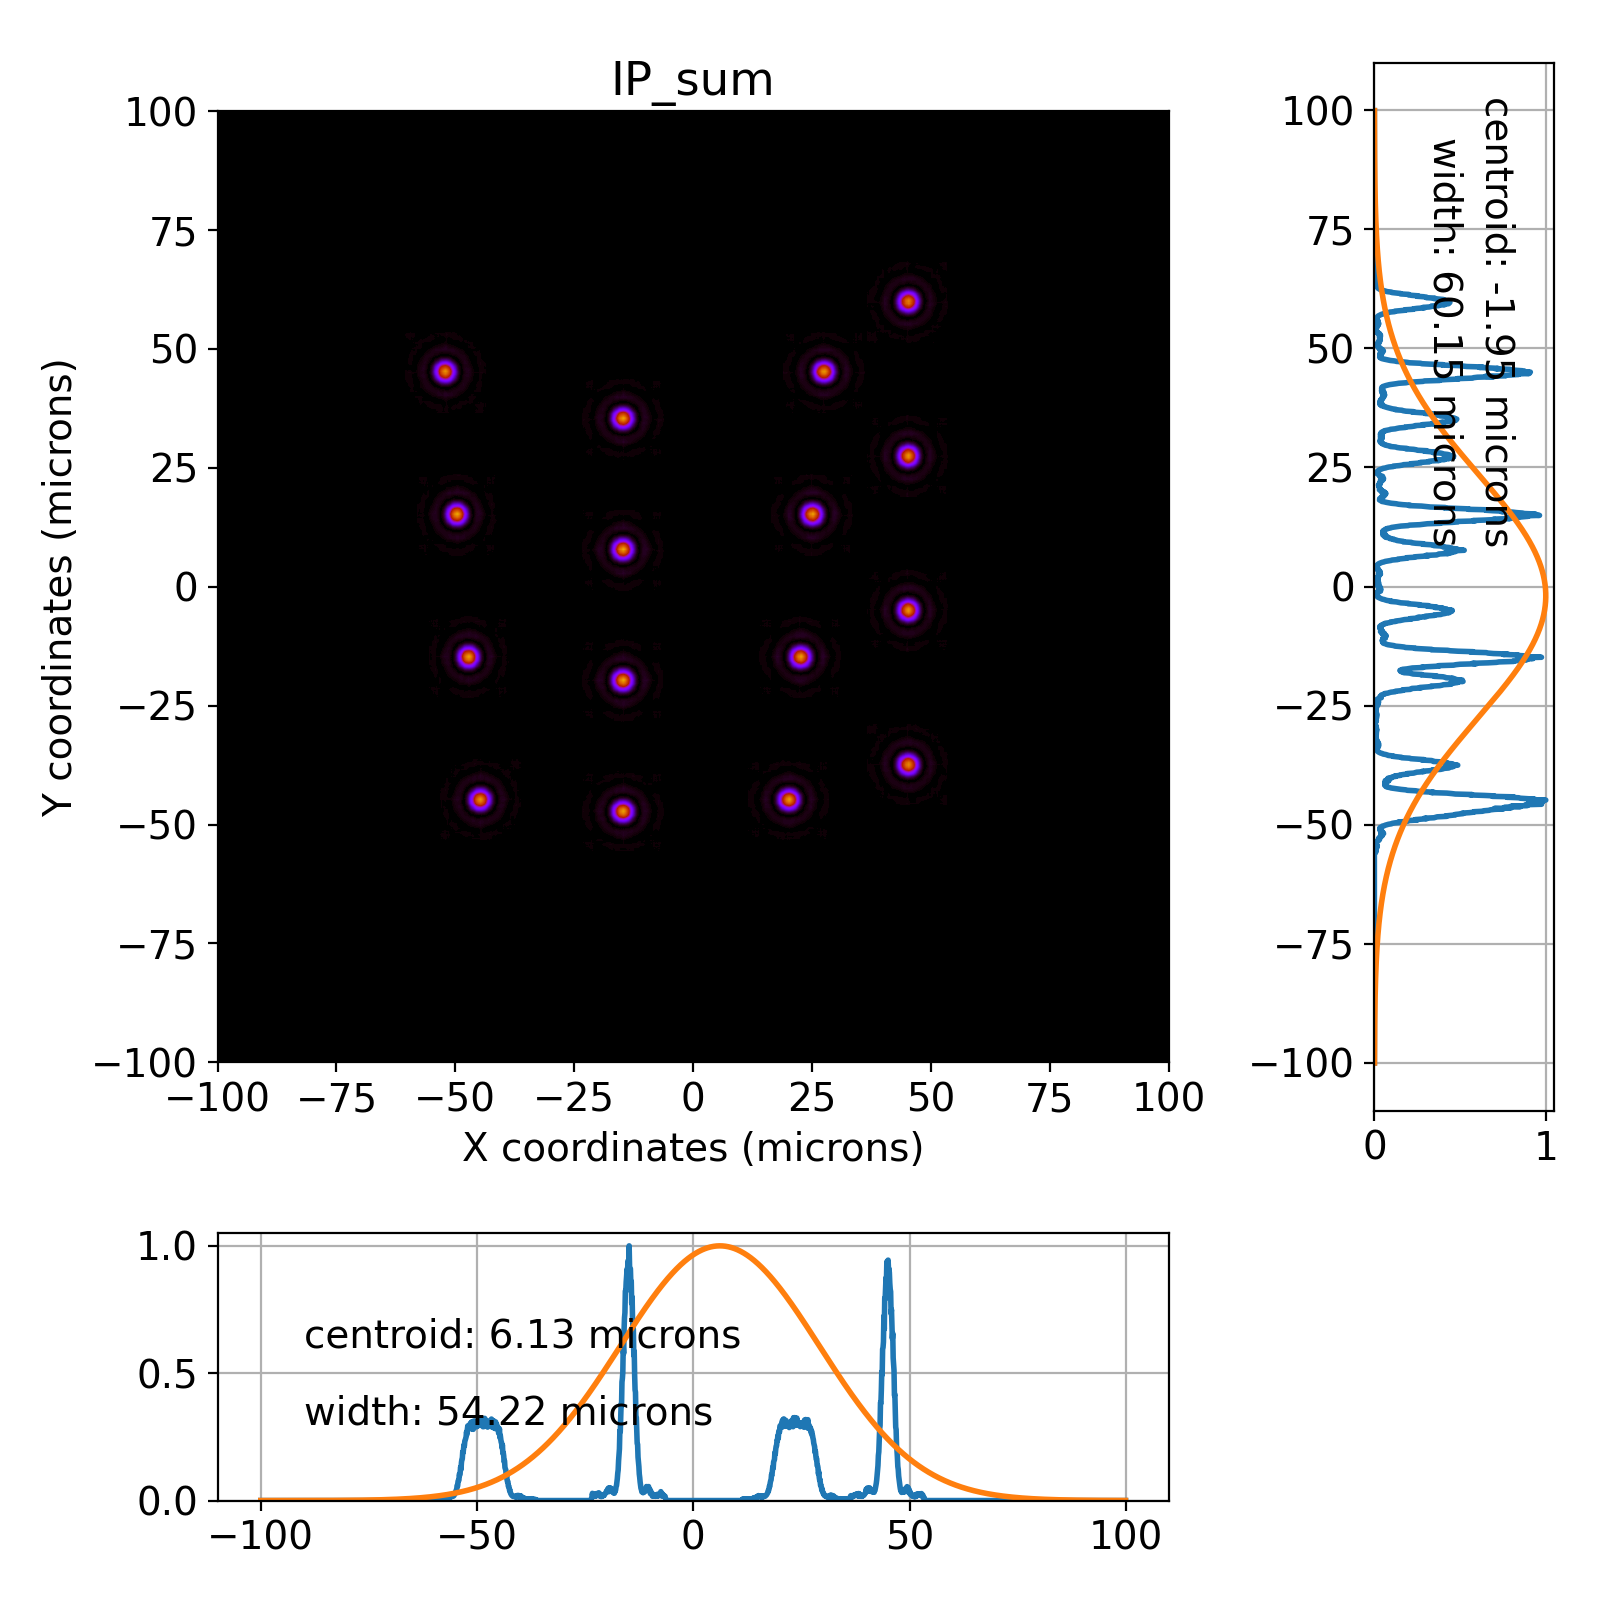

<IPython.core.display.Javascript object>


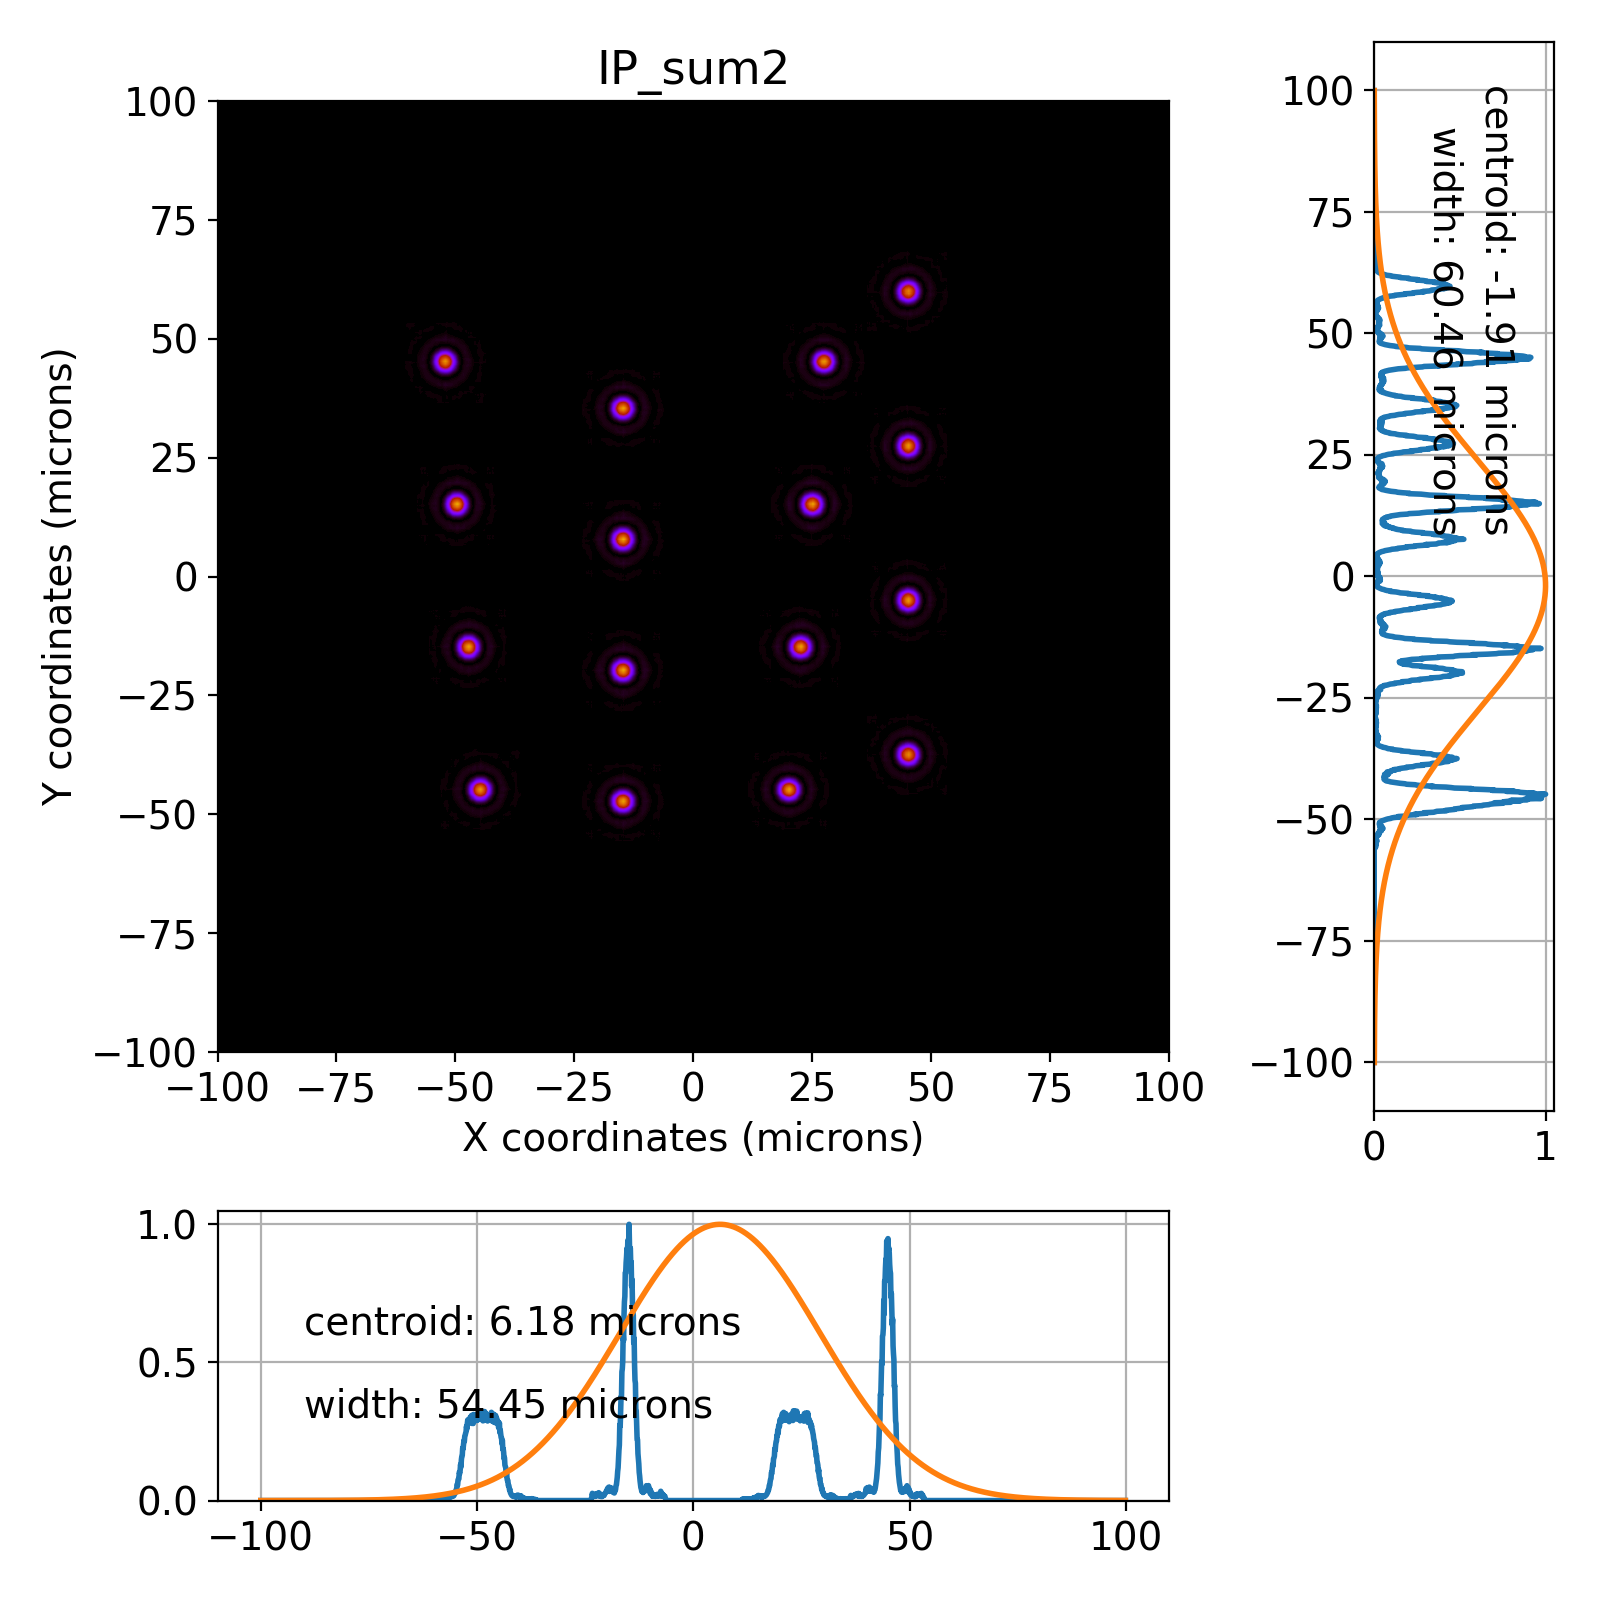

<IPython.core.display.Javascript object>


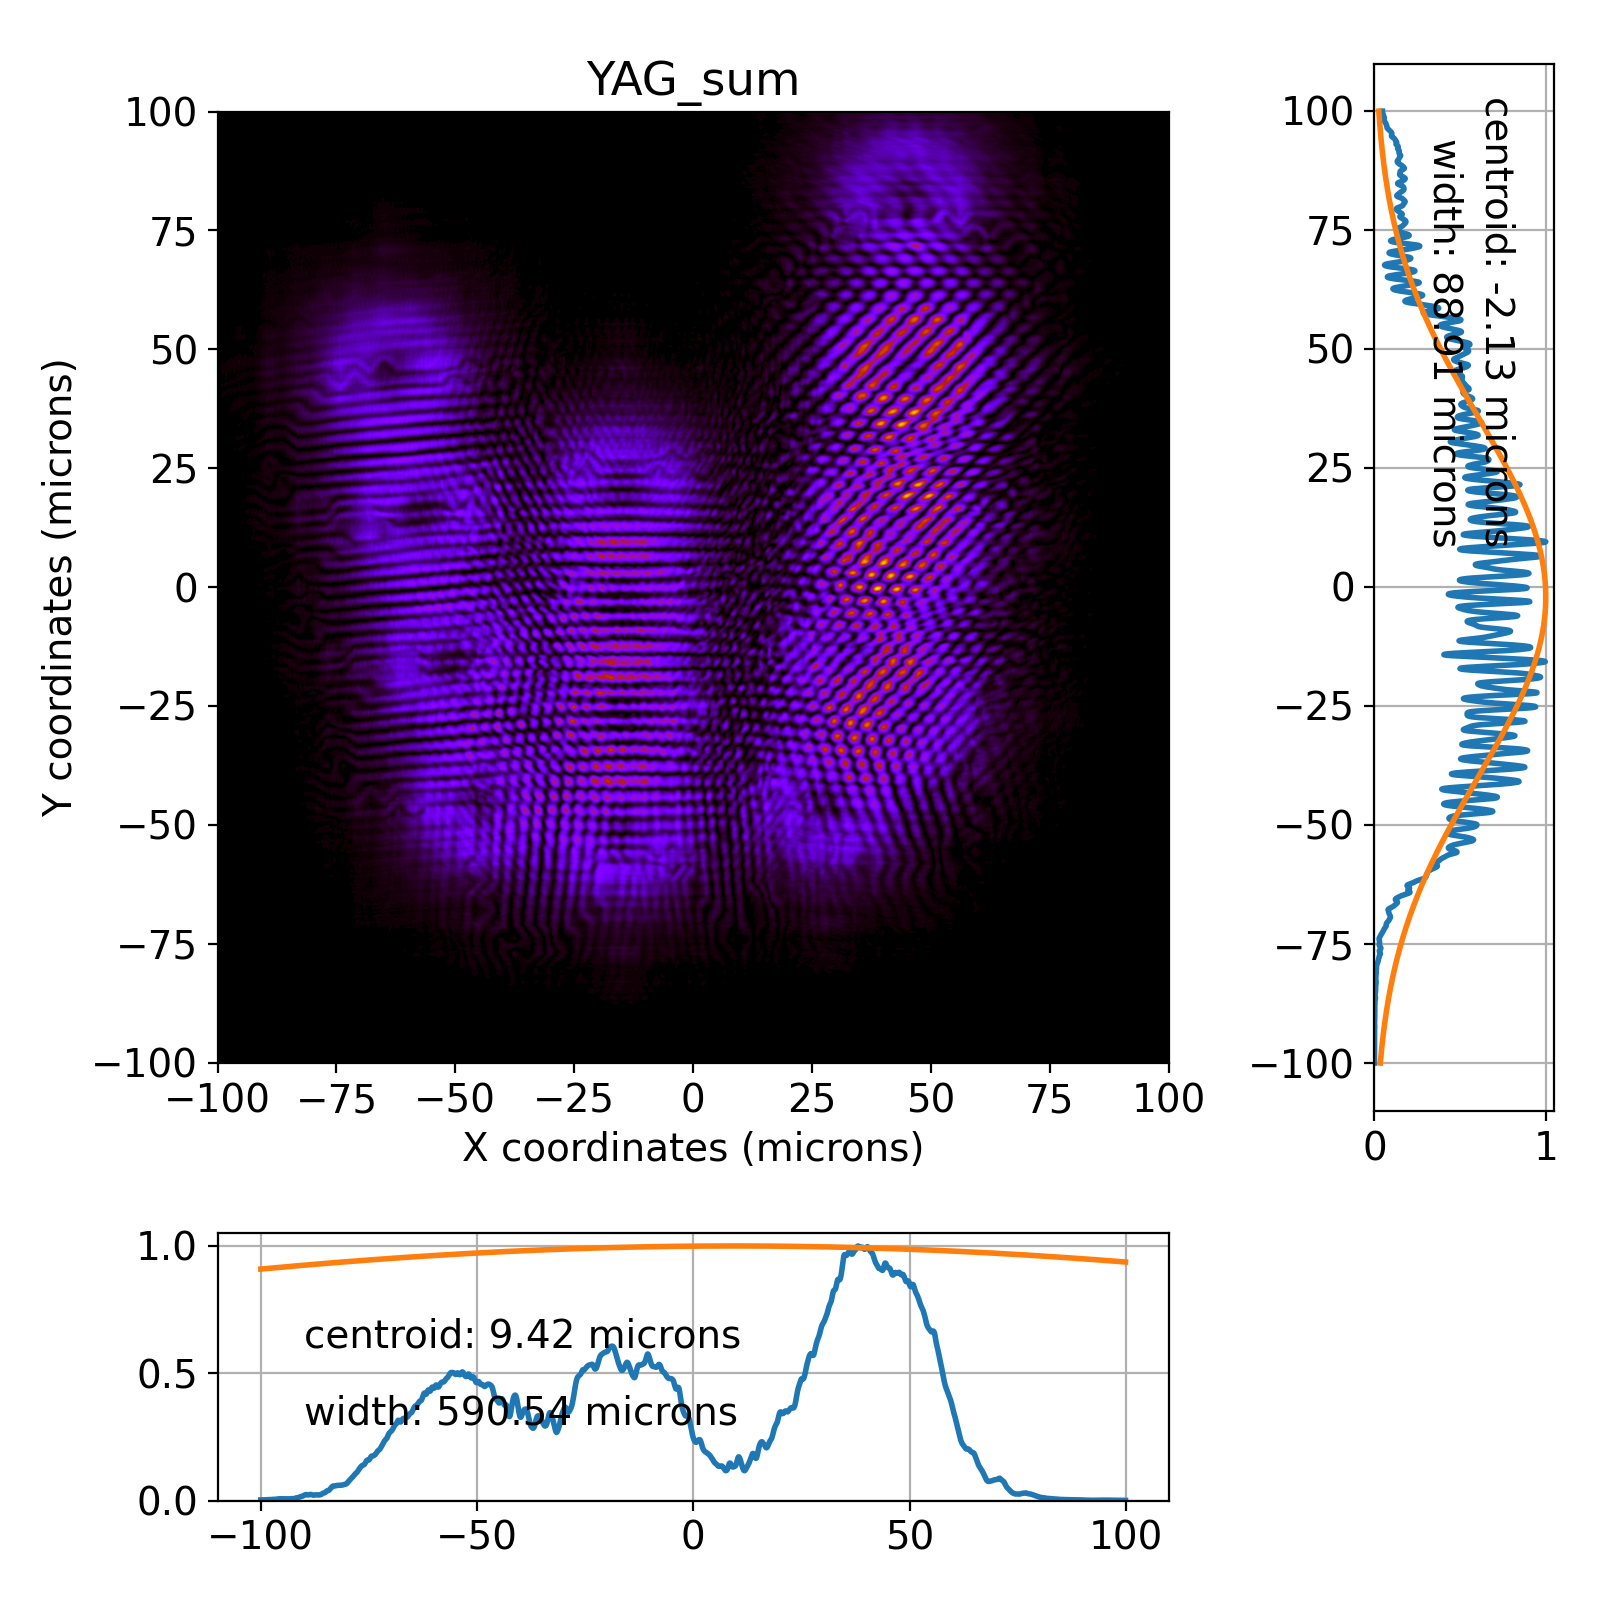

In [23]:
lens_sum.view_beam()
IP_sum.view_beam()
IP_sum2.view_beam()
downstream_sum.view_beam()

In [1]:
plt.figure()
plt.imshow(np.angle(downstream_sum.complex_profile))

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


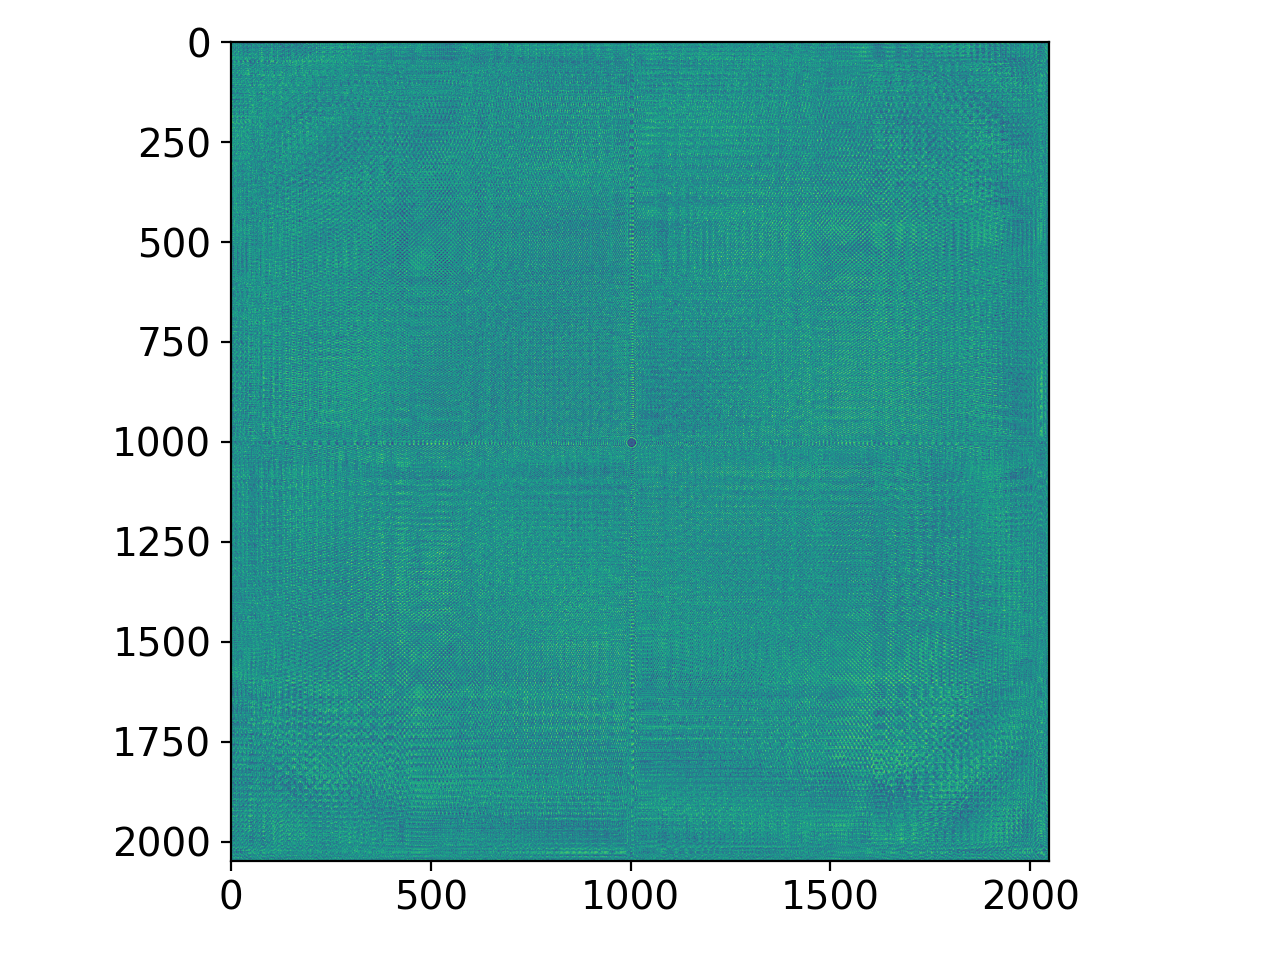

In [19]:
plt.figure()
plt.imshow(np.angle(b3.wave))